In [1]:
!nvidia-smi

Mon Jun 16 00:50:29 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!apt update
!apt install -y nvidia-cuda-toolkit

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
35 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InR

In [8]:
%%writefile hello.cu
#include <stdio.h>
#include <cuda_runtime.h>

__global__ void hello_from_gpu() {
    int tid = threadIdx.x + blockDim.x * blockIdx.x;
    if (tid == 0)  // Print only once to avoid clutter
        printf("Hello from GPU!\\n");
}

int main() {
    hello_from_gpu<<<4, 32>>>();  // 128 threads total

    cudaError_t err = cudaGetLastError();
    if (err != cudaSuccess) {
        printf("CUDA Error: %s\\n", cudaGetErrorString(err));
        return -1;
    }

    cudaDeviceSynchronize();
    return 0;
}

Overwriting hello.cu


In [9]:
!nvcc hello.cu -o hello
!./hello

CUDA Error: the provided PTX was compiled with an unsupported toolchain.\n

In [10]:
!apt remove --purge -y nvidia-cuda-toolkit


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following packages were automatically installed and are no longer required:
  fonts-dejavu-extra libaccinj64-11.5 libatk-wrapper-java
  libatk-wrapper-java-jni libbabeltrace1 libcub-dev libcublas11 libcublaslt11
  libcudart11.0 libcufft10 libcufftw10 libcuinj64-11.5 libcupti-dev
  libcupti-doc libcupti11.5 libcurand10 libcusolver11 libcusolvermg11
  libcusparse11 libdebuginfod-common libdebuginfod1 libgail-common libgail18
  libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libipt2 libnppc11 libnppial11
  libnppicc11 libnppidei11 libnppif11 libnppig11 libnppim11 libnppist11
  libnppisu11 libnppitc11 libnpps11 libnvblas11 libnvidia-compute-495
  libnvidia-compute-510 libnvidia-ml-dev libnvjpeg11 libnvrtc-builtins11.5
  libnvrtc11.2 libnvtoolsext1 libnvvm4 libsource-highlight-common
  libsource-highlight4v5 libthrust-dev libvdpau-dev node-html5shiv
  nvidia-cuda-dev nvidia-cuda-gdb nvidia-cuda-t

In [11]:
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/cuda-repo-ubuntu2004_11.8.0-1_amd64.deb
!dpkg -i cuda-repo-ubuntu2004_11.8.0-1_amd64.deb
!apt-key adv --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/3bf863cc.pub
!apt update
!apt install -y cuda-toolkit-11-8


--2025-06-16 00:53:41--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/cuda-repo-ubuntu2004_11.8.0-1_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 23.43.51.15, 23.43.51.10
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|23.43.51.15|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-06-16 00:53:41 ERROR 404: Not Found.

dpkg: error: cannot access archive 'cuda-repo-ubuntu2004_11.8.0-1_amd64.deb': No such file or directory
Executing: /tmp/apt-key-gpghome.SsqN0K0cLB/gpg.1.sh --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/3bf863cc.pub
gpg: requesting key from 'https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/3bf863cc.pub'
gpg: key A4B469963BF863CC: public key "cudatools <cudatools@nvidia.com>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Hit:1 https://developer.download.nvidia.

In [12]:
import os
os.environ['PATH'] = '/usr/local/cuda-11.8/bin:' + os.environ['PATH']

In [13]:
%%writefile hello.cu
#include <stdio.h>
#include <cuda_runtime.h>

__global__ void hello_from_gpu() {
    int tid = threadIdx.x + blockDim.x * blockIdx.x;
    if (tid == 0)
        printf("Hello from GPU!\\n");
}

int main() {
    hello_from_gpu<<<4, 32>>>();  // 128 threads

    cudaError_t err = cudaGetLastError();
    if (err != cudaSuccess) {
        printf("CUDA Error: %s\\n", cudaGetErrorString(err));
        return -1;
    }

    cudaDeviceSynchronize();
    return 0;
}

Overwriting hello.cu


In [14]:
!nvcc hello.cu -o hello
!./hello

Hello from GPU!\n

## Modified Fibonacci sequence code

In [22]:
%%writefile fibonacci.cu
#include <stdio.h>
#include <cuda.h>

#define N 220  // Number of Fibonacci numbers

__device__ unsigned long long fibonacci(int n) {
    if (n == 0) return 0;
    if (n == 1) return 1;
    unsigned long long a = 0, b = 1, c;
    for (int i = 2; i <= n; i++) {
        c = a + b;
        a = b;
        b = c;
    }
    return b;
}

__global__ void fibonacci_kernel(unsigned long long* output, int n) {
    int idx = blockIdx.x * blockDim.x + threadIdx.x;
    if (idx < n) {
        output[idx] = fibonacci(idx);
    }
}

int main() {
    unsigned long long *d_output, *h_output;
    size_t size = N * sizeof(unsigned long long);

    // Allocate memory
    h_output = (unsigned long long*)malloc(size);
    cudaMalloc((void**)&d_output, size);

    // Launch kernel
    int threadsPerBlock = 128;
    int blocksPerGrid = (N + threadsPerBlock - 1) / threadsPerBlock;
    fibonacci_kernel<<<blocksPerGrid, threadsPerBlock>>>(d_output, N);

    // Copy result back to host
    cudaMemcpy(h_output, d_output, size, cudaMemcpyDeviceToHost);

    // Print result
    for (int i = 0; i < N; i++) {
        printf("F(%d) = %llu\n", i, h_output[i]);
    }

    // Clean up
    cudaFree(d_output);
    free(h_output);

    return 0;
}

Writing fibonacci.cu


In [23]:
!nvcc fibonacci.cu -o fibonacci
!./fibonacci

F(0) = 0
F(1) = 1
F(2) = 1
F(3) = 2
F(4) = 3
F(5) = 5
F(6) = 8
F(7) = 13
F(8) = 21
F(9) = 34
F(10) = 55
F(11) = 89
F(12) = 144
F(13) = 233
F(14) = 377
F(15) = 610
F(16) = 987
F(17) = 1597
F(18) = 2584
F(19) = 4181
F(20) = 6765
F(21) = 10946
F(22) = 17711
F(23) = 28657
F(24) = 46368
F(25) = 75025
F(26) = 121393
F(27) = 196418
F(28) = 317811
F(29) = 514229
F(30) = 832040
F(31) = 1346269
F(32) = 2178309
F(33) = 3524578
F(34) = 5702887
F(35) = 9227465
F(36) = 14930352
F(37) = 24157817
F(38) = 39088169
F(39) = 63245986
F(40) = 102334155
F(41) = 165580141
F(42) = 267914296
F(43) = 433494437
F(44) = 701408733
F(45) = 1134903170
F(46) = 1836311903
F(47) = 2971215073
F(48) = 4807526976
F(49) = 7778742049
F(50) = 12586269025
F(51) = 20365011074
F(52) = 32951280099
F(53) = 53316291173
F(54) = 86267571272
F(55) = 139583862445
F(56) = 225851433717
F(57) = 365435296162
F(58) = 591286729879
F(59) = 956722026041
F(60) = 1548008755920
F(61) = 2504730781961
F(62) = 4052739537881
F(63) = 6557470319842
F(

# Visualization

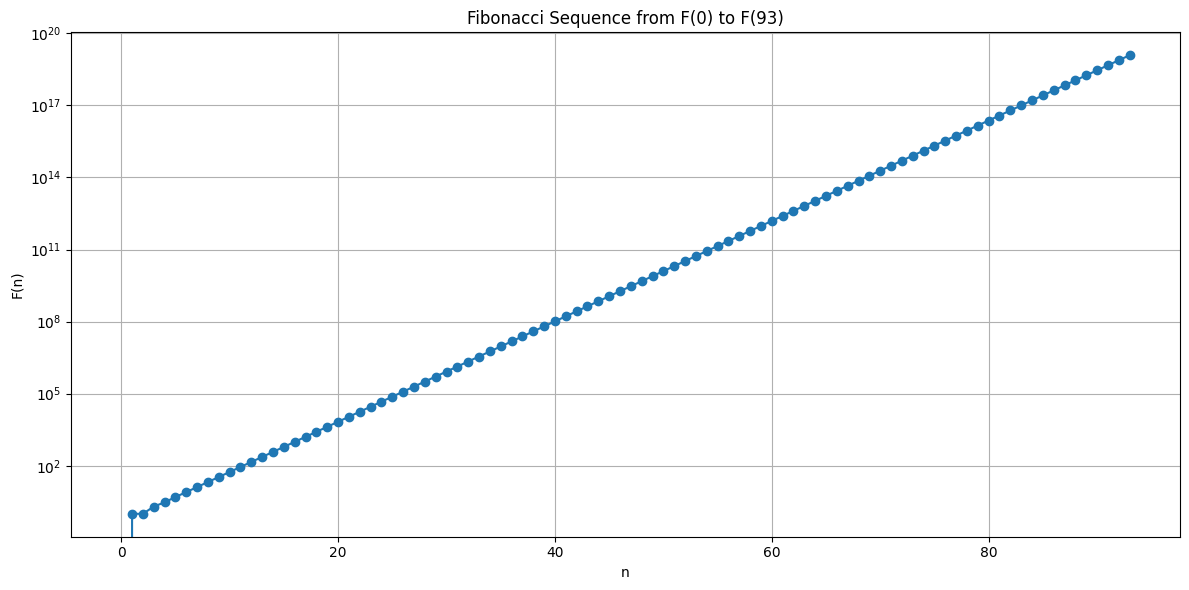

In [24]:
import matplotlib.pyplot as plt

fib_values = [
    0, 1, 1, 2, 3, 5, 8, 13, 21, 34,
    55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181,
    6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229,
    832040, 1346269, 2178309, 3524578, 5702887, 9227465, 14930352, 24157817, 39088169, 63245986,
    102334155, 165580141, 267914296, 433494437, 701408733, 1134903170, 1836311903, 2971215073, 4807526976, 7778742049,
    12586269025, 20365011074, 32951280099, 53316291173, 86267571272, 139583862445, 225851433717, 365435296162,
    591286729879, 956722026041, 1548008755920, 2504730781961, 4052739537881, 6557470319842, 10610209857723,
    17167680177565, 27777890035288, 44945570212853, 72723460248141, 117669030460994, 190392490709135,
    308061521170129, 498454011879264, 806515533049393, 1304969544928657, 2111485077978050, 3416454622906707,
    5527939700884757, 8944394323791464, 14472334024676221, 23416728348467685, 37889062373143906,
    61305790721611591, 99194853094755497, 160500643816367088, 259695496911122585, 420196140727489673,
    679891637638612258, 1100087778366101931, 1779979416004714189, 2880067194370816120, 4660046610375530309,
    7540113804746346429, 12200160415121876738
]

plt.figure(figsize=(12, 6))
plt.plot(range(len(fib_values)), fib_values, marker='o')
plt.title("Fibonacci Sequence from F(0) to F(93)")
plt.xlabel("n")
plt.ylabel("F(n)")
plt.yscale('log')  # to handle large values visually
plt.grid(True)
plt.tight_layout()
plt.show()
